In [1]:
'''Parameters:
    - chemical composition (CO/CO2, etc.)
    - migration of giant planets (start time and rate)
    - initial distribution of comets
    - D/H ratio
    
    Comets uniformly distributed all the way from 10 to 45 AU, and define a CO2/CO function that should be 
    decreasing between 10 and 30 AU and attach the parameters to the comets. 
    Run the simulations for some time (Myr to see if it is working well). Then finally migrate Jupiter.
    '''

'Parameters:\n    - chemical composition (CO/CO2, etc.)\n    - migration of giant planets (start time and rate)\n    - initial distribution of comets\n    - D/H ratio'

In [2]:
import numpy as np
import scipy as sp
import rebound
import reboundx
%matplotlib inline

In [3]:
def chemratio(a):
     return 0.1005*a - 0.995

<rebound.Orbit instance, a=5.202020409476449 e=0.03555213571651079 inc=0.02187141334990789 Omega=1.7513603553718586 omega=0.5276297626846184 f=2.323597503652099>
<rebound.Orbit instance, a=9.548096992301994 e=0.07646852256724301 inc=0.04337164163570941 Omega=1.8874536793401155 omega=1.1996601797899553 f=-0.03244829092282053>
<rebound.Orbit instance, a=19.224039433512278 e=0.006236533508218369 inc=0.021557725508688196 Omega=2.6034206338401558 omega=2.4868596249200285 f=-5.539370227994226>
<rebound.Orbit instance, a=33.16291558126877 e=0.006729027100521961 inc=0.032838067999037164 Omega=2.204716517740636 omega=-0.7940563627871926 f=-1.0688103270766778>
<rebound.Orbit instance, a=14.624119884591883 e=0.2680366846478568 inc=0.06301114238159106 Omega=2.626633394156456 omega=-1.244705637343662 f=3.918838678228945>
<rebound.Orbit instance, a=31.83915331070858 e=0.09716968077653348 inc=0.06309668098874088 Omega=2.0072697441353844 omega=1.247306850327717 f=-3.0725964808274533>
<rebound.Orbit in

Widget(N=55, count=2, height=300.0, orbit_data=b'\x96\xfe9:\x1bu\x97;\xae\xc4\xa1\xb8\xf4v\xa6@\x1e\x9f\x11=\xd2\xb5\x14@\xbe\x12\x07?\x93,\xe0?\xae+\xb3<\xb0\xb4 93\xa0\xdf\xb9\xf1$>\xb8\x01\xc5\x18A\x87\x9b\x9c=\x80\xe8\x04\xbdw\x8e\x99?\x15\x98\xf1?v\xa61=\xdc5\x1a\xbb\xd9RY\xb9!\xf7f8\xd5\xca\x99A\xd6[\xcc;\x85B\xb1\xc0\xb5(\x1f@r\x9e&@\xd4\x99\xb0<~\xe5\xd1\xba\xd9L\x15\xba\xed@`8\xd3\xa6\x04B,\x7f\xdc;\xc7\xce\x88\xbfGGK\xbf\x13\x1a\r@6\x81\x06=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3e\xfciA\x1b<\x89>A\xcez@\x84R\x9f\xbf\xc3\x1a(@\xfc\x0b\x81=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\x96\xb6\xfeA\xe6\x00\xc7=l\xa5D\xc0\xc0\xa7\x9f?\x1cw\x00@\xd58\x81=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xaf:\xa5A\x1a\xb7\r>\x06\x16H?\x140\x0f\xc0\x87+=@!\xdf\x19=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3c\xfctA\xa7\xf8\xc2=\x10\xf66@Yc\xc8\xbf\xe4M\x80?\xa7\x00[<[\xc9\x9f"X\x0c\x17%o\xd2b\xa3w\xd5\xabA\x8f\xdf3?$z.\xc0Z\\\xdc\xbbC\xcf\xdc\xbeLC\x04>[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xe0,\x80A\xa4\x84]>?!S\xc0-4)@\x11\xdfD\xbf\x90Q\xb6=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3*4\xbcA\x9e\xc9\xba=\xf1;\xa4>\xa8\x96\x01\xc0B\xd2\x17@~\xcb\x0b=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\x8e\xa7\x8aA\xf3\xce\xcb=\x89Tk?g\xd5\xfe\xbe\x05\x1a\xf2?\x9aw\x14=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3$X\xa7A\x96-\xe7=\x86\xe1~@\xb0\xfeC\xc0\xfb\xa2\xa9?\x05\x1e\xc1=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3D\x9c\x96A\xa7\x91{=u\xd7\xd9\xbf"\xa8w?\xee\xe7\xd7?\xbf\xcc\xe4<[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xd9{5B\x9c\xa2L?\x87\xe69\xbep\xd3\xd5?.\xe5\xf9?}W\xd5=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xf0\t\xbdAb\xab@>\xf6\x05\xd9\xbe\x88\xf3#@\xef }\xbfB\xfa8=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\x0c\x18<A\xae>\x9e>\x1d\xc9\x1e\xc0\xc9\xb52@ 3\x18@;\xb7b>[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xbab\xa0A\xf1\x87\x15=\xa4\xc8\x8f\xc0\xc8\x0f-@-\xdb\'\xc0k\xea\xbb<[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\x14d\xcbAp\xc6F=\xc1\x92\xae>\xe3\xfb\x1e@\xb3\xb18@!\x1eX=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3nu\xc3A\xfaXa>hMp@\x0b\x0e.\xc0\x95\xfe*\xc0\xc7w\xc3=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\x95\xe3GA\xd11->\xe9\x11\\\xbf$2l?P7\x1c@\x8d)\xc0<[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xf60\xc9AR\x0f\x96>K\xad\x15\xc0\x8f\xaeD@e\xd5\xf9?Cm\xd5=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xd2\x96\x9eA1\xc0\xfa=\x9f\x00<\xc0\xac\xf3\xb3?\xedZ7\xc0blH=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\x0e\x04\xc3AU\xe8U=AT\xcd>\x90\x9e\x1c@\xa7-\x13@\xee\x99\r=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\x88\xbf_A\xc2\xdc\xbe=\xe5d]\xbe\xec\\\xbe\xbel\xcf\x0f@\xb3r1=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xc8\xc4\xacAOC\x06>\r^d\xbf\r\xbf\xe1\xbe\x1a\x846?\n~\xc6=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3Ko\xd1A\xcc\xc1\xc0=\xf2*\xe4\xbft\xcd\x97?\xa0\xce0@\x99[3=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3t\xd8\x8bA\x9cJ1>R\xf1\xe0\xbf\x99g\xc8?\x0c\xc9B\xc0\xa5Y\xcb=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3>\xc6\xe2A"\xe87>w15@\x15\xd1\xf2\xbf\x7f\xf0\xc3>qW\x14=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xd4\xb1\x99A\xd9)<>\x91r5@\x17O_=\xf3j;@\x14\xdb\x0c=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3 \xbe\xafAz.\xf8=^`\x18@Z\x85\x14\xc0\xe8-\x1f@\x8b\x11\x8f=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3D\xb3\x97A=\x9f >\x07\x94\xe3\xbfE\x15N>\x93\xfa\x1c@s`\x15=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\x06\x84\x8cA\x10\x07,>\x7fg\xe8\xbf3\x1dH@\xf1\x92\xc0?K\xeb\xbf=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\x82(\x86A\xae\xff\x91>2\xc3\x9f\xc0\'<E@o\x96\xa7?\xf8\xf9l=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3M\x7f\x98A\xb57\n>p\xb4e\xbf\xc7\x9d\x17@o\xf3(@\x947\x19=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3v\xfe\xbdA\xc5\xb2\x05>\xa7\x83^\xbd/g~\xbf\xe7\x81\x1a@\xd2\xd4\x0f=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3&v\x06B\xd3\xba\x0e>\xdd\xba\xd8?\xd7\x96\xbe>\x0c\x8c:\xc0\rR+<[\xc9\x9f"X\x0c\x17%o\xd2b\xa3J\x01\x81A7\x82\x10>\x84"#@\xceE\xf6\xbe\x98\xc1`?\x08\x84\xe19[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xff4`A\xbb\x15\xe1=<\xa2\xcd?\x1b\x0f\xa9\xbf\x03\x7f!@\xe3Z\t=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3|n\xd9A\xfb\x98\x00>Gn\xda?_e\x82\xbfd\xac\xb2=\x9a\xab\x11=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xbe\x96\xbbAF-\x87>)\x98G@\xc4\x16B\xc0\x7f\x8dy?qHD=[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xe0\xea\xf8@\x1by\xfa=\x10\x1c\x87\xc0\xc0\xfc\xc2?9\x01\x1c?3hq>[\xc9\x9f"X\x0c\x17%o\xd2b\xa3\xe0\x94\x0eB\xa5\xaf\x11>\xf1,8@\x08!}\xbfm\

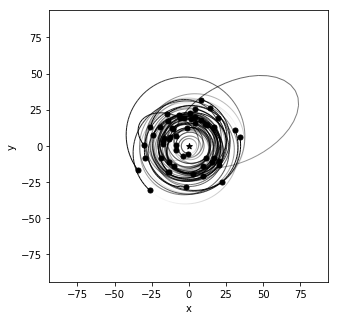

In [4]:
sim = rebound.Simulation()
sim.integrator = "ias15"
sim.units = ('yr', 'AU', 'Msun')
a_neptune = 30.05

tmax = 1e5
n_comets = 5

try:
     sim = rebound.Simulation.from_file("solarsystem.bin")
except:
     sim.add('sun')
     sim.add('jupiter')
     sim.add('saturn')
     sim.add('uranus')
     sim.add('neptune')
     sim.save("solarsystem.bin")


rebx = reboundx.Extras(sim)
rebx.add("modify_orbits_forces")
sim.particles[4].params["tau_a"] = 1e6

a = np.random.uniform(low = 10., high = 45. , size = n_comets)

for i in xrange(0,n_comets):
     rand = np.random.random()*2*np.pi
     sim.add( a=a[i], e=0.15, inc=0., Omega=0, omega=rand, f=rand )
     sim.particles[-1].params["CO/CO2"] = chemratio(a[i])
sim.exit_max_distance=1e5


sim.integrate(tmax)
sim.move_to_com()


orbits = sim.calculate_orbits()
for orbit in orbits:
     print(orbit)


fig = rebound.OrbitPlot(sim)
sim.getWidget(size=(500,300),scale=1.8*a_neptune)